Vamos a usar un generador random de numero enteros, en el rango [0;100] para este ejercicio

In [90]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import math

Creo una funcion que genere una lista de numero aleatorios natural con randint y que calcule la varianza de esta lista. 
Para esto primero debemos calcular la media, con la media aritmetica: 
<center>
$Xmedio = \frac{ \Sigma Xi}{N}$
</center>
Donde N es el cardinal de la muestra.
Entonces para calcula la varianza muestral hacemos:
<center>
$ S^2 = \frac{\Sigma (Xi - Xmedio)^2}{N-1}$
</center>

In [82]:
#Cargamos el archivo.  
data = np.genfromtxt('cumulos_globulares.dat', usecols=6) #Son magnitudes de estrellas en un cúmulo
# data tiene NaNs, así que usamos solo los numéricos.
data = data[~np.isnan(data)]

In [83]:
len(data)

148

In [121]:
def Varianza(a = data):
    n = len(a)
    S = []
    Xm = sum(a)/n
#      Xm es la media
    
    for j in (a):
        xi = (j - Xm)**2
        S.append(xi)
    S2 = sum(S)/(n-1)
    return(S2)
        

In [122]:
Varianza()

2.225189740761169

Quiero hacer varias muestras usando data, sin resposicion, que sortee valores aleatorios en la lista y crear un grafico de las varianzas que obtengo

In [111]:
def muestra():
    X = []
    for i in range (len(data)):
        x = data [randint(0,len(data)-1)]
        X.append(x)   
    return (X)
# Esto funcion me genera una muestra eligiendo de manera aleatoria los valores de data

In [166]:
lista = []
for i in range (10000):
#     Hago 10000 muestras
     m = muestra()
     lista.append(m)
#         Creo una lista de 100 muestras aleaotorias

In [167]:
# Para chequear
print(len(lista))
# Veo cuantos elementos tiene la lista
print(len(lista[1]))
# Veo cuantos elementos tiene un elemento de la lista, deben coincidir con len(data)

10000
148


Ahora quiero calcular la varianza de cada una

In [168]:
M = [] 
for i in (lista):
        s = Varianza(i)
        M.append(s)          

In [152]:
len(M)

1000

Text(0, 0.5, 'Conteo')

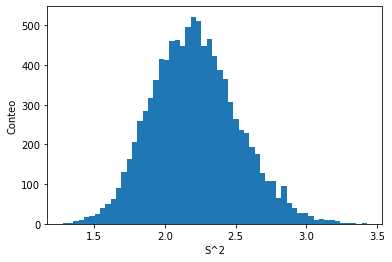

In [169]:
plt.hist(M, bins = 'fd')
plt.xlabel('S^2')
plt.ylabel('Conteo')

In [ ]:
El resto no lo pude hacer, no me alcanzo el tiempo.